In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("movie_metadata.csv")

In [41]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [42]:
# Color doesn't do anything
# dropping that
df.drop("color",axis = 1,inplace= True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [44]:
df.shape

(5043, 27)

### Checking null values in each column

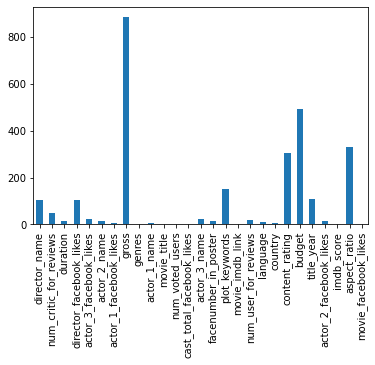

In [45]:
nullvals = df.isna().sum()
nullvals.plot.bar()

We can see that there are a lot of null values

#### Removing some of the null value rows

In [17]:
# Finding the number of null values per row
di = {"index":[],"Nullnum":[]}
for i in range(len(df)):
    n = df.iloc[i].isna().sum()
    if n > 0:
        di["index"].append(i)
        di["Nullnum"].append(n)

df2 = pd.DataFrame(di)   

In [21]:
# Creating a dataframe out of it
df2 = df2.sort_values(by="Nullnum",ascending=False)
df2

,index,Nullnum
12,279,14
0,4,13
1213,4945,11
178,2241,11
167,2143,10
...,...,...
376,3253,1
375,3252,1
790,4237,1
791,4239,1


In [127]:
# indices of rows with more than 5 null values
list_rows = list(df2[df2["Nullnum"]>5]["index"])

In [31]:
# dropping rows the more than 5 null values
for j in list_rows:
    df.drop(j,axis=0,inplace=True)

In [33]:
# Reseting index of df
df.reset_index(inplace=True)
df.drop("index",axis=1,inplace=True)
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
4967,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
4968,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
4969,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [36]:
# New df after removing rows with more than 5 null values
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


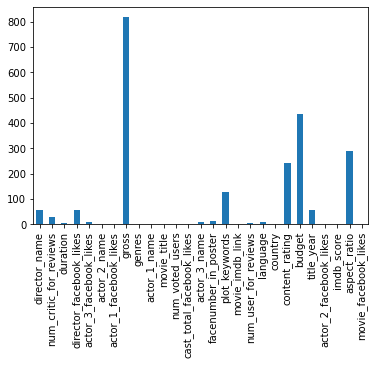

In [38]:
# Still null values excist
# But there number is reduced
nullvals = df.isna().sum()
nullvals.plot.bar()

In [46]:
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

### Most frequest Genres

In [50]:
df["genres"].nunique()

914

In [52]:
df["genres"].value_counts().head(10)

Drama                          236
Comedy                         209
Comedy|Drama                   191
Comedy|Drama|Romance           187
Comedy|Romance                 158
Drama|Romance                  152
Crime|Drama|Thriller           101
Horror                          71
Action|Crime|Drama|Thriller     68
Action|Crime|Thriller           65
Name: genres, dtype: int64

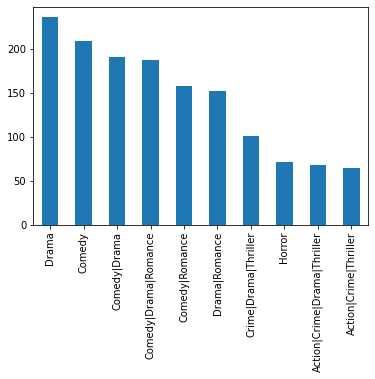

In [53]:
df["genres"].value_counts().head(10).plot.bar()

### Directors with the most films

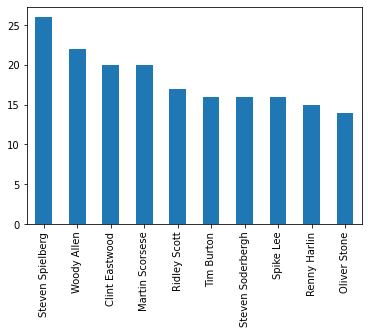

In [56]:
# directors woth most movies
df["director_name"].value_counts().head(10).plot.bar()

### Highest grossing movies of Steven Spielberg

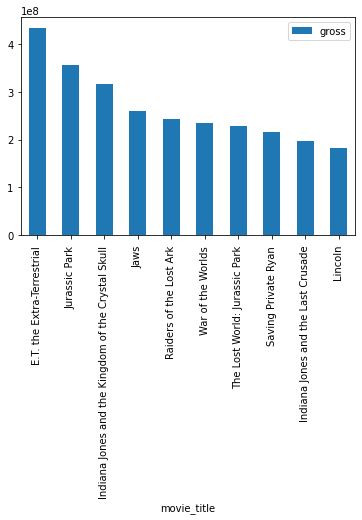

In [66]:
# Highest grossing movies of stefen spilberg
df_highest_spliberg = df[df["director_name"]=="Steven Spielberg"][["movie_title","gross"]].sort_values(by="gross",ascending=False).head(10)
df_highest_spliberg.plot.bar(x="movie_title",y="gross")

### Highest grossing movies of all time

In [69]:
# highest grossing movies overall
df_gross = df[["movie_title","gross"]].sort_values(by="gross",ascending=False).head(10)
df_gross

,movie_title,gross
0,Avatar,760505847.0
26,Titanic,658672302.0
29,Jurassic World,652177271.0
794,The Avengers,623279547.0
17,The Avengers,623279547.0
66,The Dark Knight,533316061.0
240,Star Wars: Episode I - The Phantom Menace,474544677.0
3024,Star Wars: Episode IV - A New Hope,460935665.0
8,Avengers: Age of Ultron,458991599.0
3,The Dark Knight Rises,448130642.0


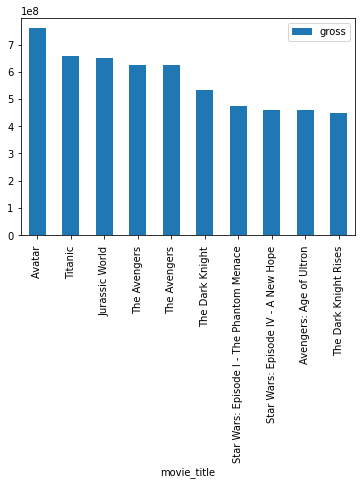

In [71]:
df_gross.plot.bar(x="movie_title",y="gross")

### Highest rated movies in IMDB

In [72]:
# movies with highest imdb score
df_imdb = df[["movie_title","imdb_score"]].sort_values(by="imdb_score",ascending=False).head(10)
df_imdb

,movie_title,imdb_score
2765,Towering Inferno,9.5
1937,The Shawshank Redemption,9.3
3466,The Godfather,9.2
4409,Kickboxer: Vengeance,9.1
2824,Dekalog,9.1
3207,Dekalog,9.1
66,The Dark Knight,9.0
2837,The Godfather: Part II,9.0
3481,Fargo,9.0
339,The Lord of the Rings: The Return of the King,8.9


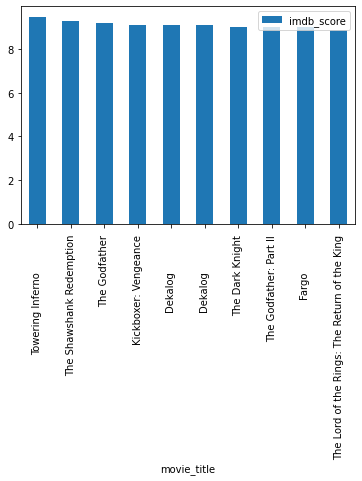

In [74]:
df_imdb.plot.bar(x="movie_title",y="imdb_score")

### Distribution of the gross collection of all the movies

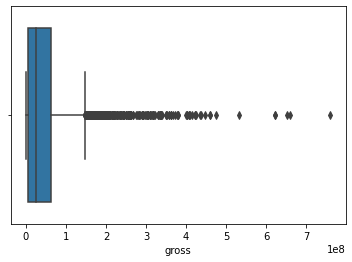

In [75]:
# distribution of gross
sns.boxplot(df["gross"])

We can see that there are some movies with exceptionally high gross collections

### Most popular movies

In [83]:
# movies with the most likes on facebook
df_popular = df[["movie_title","movie_facebook_likes"]].sort_values(by="movie_facebook_likes",ascending=False).head(10)
df_popular

,movie_title,movie_facebook_likes
96,Interstellar,349000
296,Django Unchained,199000
10,Batman v Superman: Dawn of Justice,197000
128,Mad Max: Fury Road,191000
179,The Revenant,190000
97,Inception,175000
99,The Hobbit: An Unexpected Journey,166000
2614,The Imitation Game,165000
3,The Dark Knight Rises,164000
278,The Martian,153000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

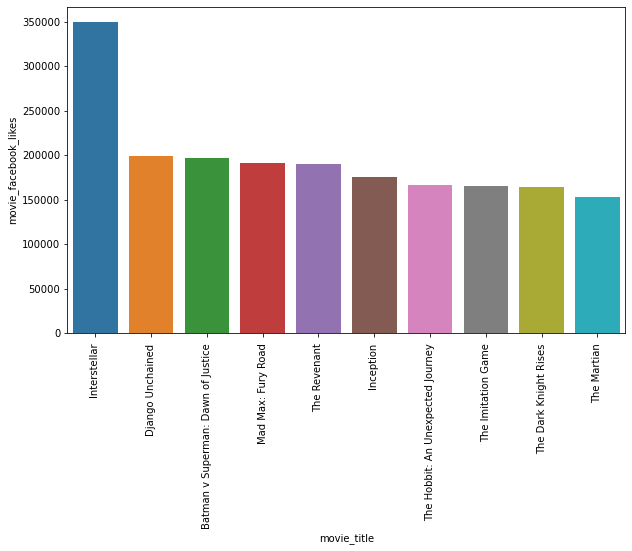

In [126]:
plt.figure(figsize=(10,6))
sns.barplot(x="movie_title",y="movie_facebook_likes",data=df_popular)
plt.xticks(rotation=90)

### Relation between Gross and imdb score

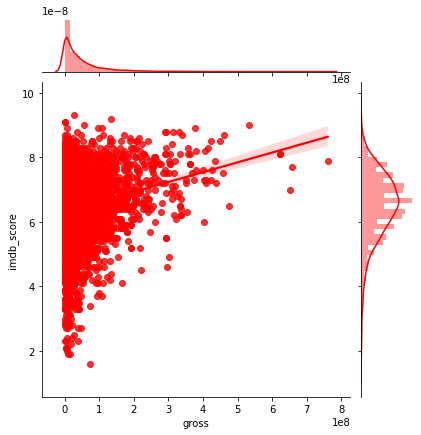

In [89]:
# relation between gross and imdb score
sns.jointplot(df["gross"],df["imdb_score"],kind="reg",color="red")

### Relation between Gross and likes on facebook

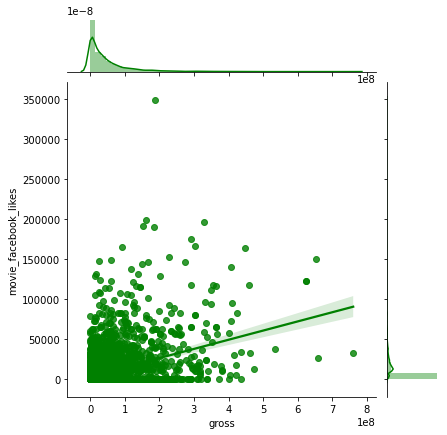

In [92]:
# relation between gross and facebook likes
sns.jointplot(df["gross"],df["movie_facebook_likes"],kind="reg",color="g")

### Christopher Nolan Movies

In [93]:
# Nolan movies
df_nolan = df[df["director_name"] == "Christopher Nolan"]
df_nolan

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
66,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,...,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000
96,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,Matthew McConaughey,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000
97,Christopher Nolan,642.0,148.0,22000.0,23000.0,Tom Hardy,29000.0,292568851.0,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,...,2803.0,English,USA,PG-13,160000000.0,2010.0,27000.0,8.8,2.35,175000
120,Christopher Nolan,478.0,128.0,22000.0,11000.0,Liam Neeson,23000.0,205343774.0,Action|Adventure,Christian Bale,...,2685.0,English,USA,PG-13,150000000.0,2005.0,14000.0,8.3,2.35,15000
1066,Christopher Nolan,185.0,118.0,22000.0,319.0,Maura Tierney,14000.0,67263182.0,Drama|Mystery|Thriller,Al Pacino,...,651.0,English,USA,R,46000000.0,2002.0,509.0,7.2,2.35,0
1233,Christopher Nolan,341.0,130.0,22000.0,19000.0,Hugh Jackman,23000.0,53082743.0,Drama|Mystery|Sci-Fi|Thriller,Christian Bale,...,1100.0,English,USA,PG-13,40000000.0,2006.0,20000.0,8.5,2.35,49000
3716,Christopher Nolan,274.0,113.0,22000.0,379.0,Thomas Lennon,716.0,25530884.0,Mystery|Thriller,Callum Rennie,...,2067.0,English,USA,R,9000000.0,2000.0,651.0,8.5,2.35,40000


In [97]:
# Most popular nolan movies
df_nolan_popular = df_nolan[["movie_title","movie_facebook_likes"]].sort_values(by="movie_facebook_likes",ascending=False)
df_nolan_popular.set_index("movie_title",inplace=True)
df_nolan_popular

,movie_facebook_likes
movie_title,
Interstellar,349000
Inception,175000
The Dark Knight Rises,164000
The Prestige,49000
Memento,40000
The Dark Knight,37000
Batman Begins,15000
Insomnia,0


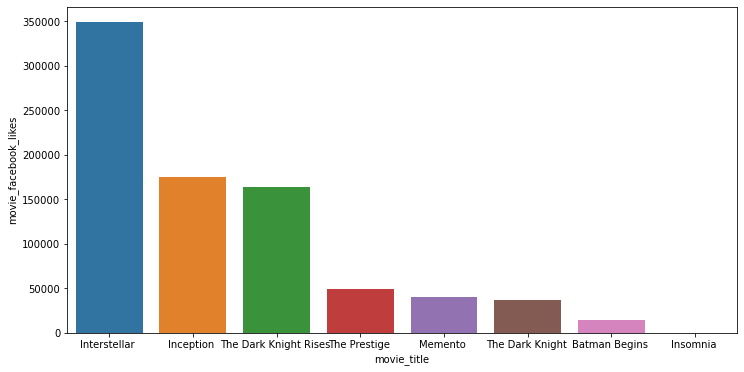

In [110]:
plt.figure(figsize=(12,6))
sns.barplot(x=df_nolan_popular.index,y=df_nolan_popular["movie_facebook_likes"])

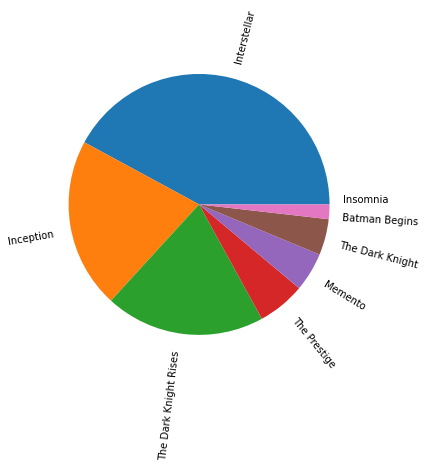

In [118]:
plt.figure(figsize=(6,6))
plt.pie(df_nolan_popular["movie_facebook_likes"],labels=df_nolan_popular.index,rotatelabels=True)
plt.show()

### Most popular directors 

In [190]:
# Most popular directors on basis on facebook likes
df_directors = df[["director_name","director_facebook_likes"]]
x = [[list(i[1]["director_name"])[0],list(i[1]["director_facebook_likes"])[0]] for i in df_directors.groupby("director_name")]

In [191]:
df_directors = pd.DataFrame(x,columns=["Director_name","Facebook_likes"])

In [193]:
df_directors = df_directors.sort_values("Facebook_likes",ascending=False).head(10)
df_directors

,Director_name,Facebook_likes
1199,Joseph Gordon-Levitt,23000.0
373,Christopher Nolan,22000.0
503,David Fincher,21000.0
572,Derick Martini,20000.0
569,Denzel Washington,18000.0
1303,Kevin Spacey,18000.0
1477,Martin Scorsese,17000.0
1826,Quentin Tarantino,16000.0
391,Clint Eastwood,16000.0
2251,Tom Hanks,15000.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

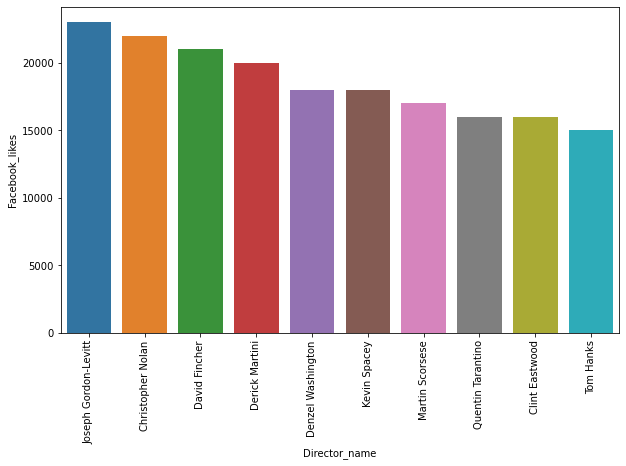

In [194]:
plt.figure(figsize=(10,6))
sns.barplot(x="Director_name",y="Facebook_likes",data=df_directors)
plt.xticks(rotation=90)